# Tarea 2
## Física Computacional
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 



## Python 


En clase vimos la forma de hacer la integral numérica en la que en la que se aproxima la integral de una función de la siguiente manera

In [175]:
# Líbrerías 
from pylab import * # se importa la libreria pylab
from scipy.integrate import * # se importa la libreria scipy.integrate
import random
from numpy import array
import math
%matplotlib inline
# %matplotlib inline despliegue gráfico de la librería matplotlib se haga dentro del mismo notebook 

<span style="color:red">.1. En clase vimos la forma de hacer la integral numérica en la que se aproxima la integral de una función de la siguiente manera
$$ \int_{x_i-h}^{x_i+h}f(x)dx=\frac{f(x_i-1)+4f(x_i)+f(x_i+1)}{3}h+\mathcal{O}(h^{5})$$
donde se desprecian los términos $\mathcal{O}$. Calcule las integrales de las siguientes funciones para una malla uniforme:</span>

    
<span style="color:red"> $\int_0^{5}f(x)dx$ </span>
    
<span style="color:red"> $\int_{-5}^{5}f^{2}(x)dx$ </span>
    
<span style="color:red"> $\int_{0.5}^{5}g(x)dx$ </span>


<span style="color:red"> donde $f(x)=e^{-x^{2}}\sin(x)$ y $g(x)=-{\frac{2}{x^{6}}}+{\frac{1}{x^{12}}}$. Muestre que ha podido integrar hasta una precisión de $10^{-4}$.</span>

 *Podemos utilizar el segundo algoritmo que desarrollamos en el notebook pasado.*

***Para $\int_0^{5}f(x)dx$:***

In [176]:
#Se define la integral: 
def int_1(f,x):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
     #Recordando las notas de pizzarrón "Integrales numéricas" tenemos que ocupar casos por si las N son par o nel : (N que ocupa las notas no es la misma
    # Si la malla sobre la que se va a integrar es par debe iniciar en el tercer elemento
    if mod(len(f),2) == 0:
        inicio = 2 
    #Si el número de puntos en la malla es impar debe iniciar en el segundo elemento
    elif mod(len(f),2) == 1: # Esta instruccion es opcional si se tienen varias decisiones "Mi segundo Notebook Python 2 II"
        inicio = 1
    #Pedimos  sume las particiones y que vaya de dos en dos.
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #En la frontera tenemos a la integral como: 
     # punto inicial si se tiene un arreglo par "Notebook 7"
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4]) #tal como está en "Notebook 7" jiji 
    return integral

Obtenemos la integral donde el rango de integración va de 0 a 5:

In [177]:
# Tenemos la malla 1: 
x=linspace(0,5,1000)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de f(x) es: ', int_1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.1021340744237976138708054220876899
print("La precisión de la integral es: ", abs(m-int_1(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de f(x) es:  0.1021341884080086
La precisión de la integral es:  1.1398421098651745e-07


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{-5}^{5}f^{2}(x)dx$:***

In [178]:
#Podemos copiar y pegar hasta donde empieza "for" porque tenemos lo primero que vemos si es par o no es prácticamente lo mismo xD
def int_2(f,x):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
     #Recordando las notas de pizzarrón "Integrales numéricas" tenemos que ocupar casos por si las N son par o nel: (N que ocupa las notas no es la misma)
    # Si la malla sobre la que se va a integrar es par debe iniciar en el tercer elemento
    if mod(len(f),2) == 0: 
        inicio = 2
     #Si el número de puntos en la malla es impar debe iniciar en el segundo elemento
    elif mod(len(f),2) == 1: # Esta instruccion es opcional si se tienen varias decisiones "Mi segundo Notebook Python 2 II"
        inicio = 1
   #Pedimos  sume las particiones y que vaya de dos en dos.
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1]*f[i+1] + 4*f[i]*f[i] + f[i-1]*f[i-1] #*f[n] =*f[n]*f[n] porque es f^{2}
    integral = integral*(h/3)
   #En la frontera tenemos a la integral como: 
   # punto inicial si se tiene un arreglo par "Notebook 7"
    if mod(len(f),2) == 0: 
        integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])#tal como está en "Notebook 7" pero para este caso *y[n] =*f[n]*f[n] porque es f^{2} 
    return integral


Obtenemos la integral donde el rango de integración va de -5 a 5:

In [179]:
# Tenemos la malla 2: 
x=linspace(-5,5,100)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de $f^{2}(x)$ es: ', int_2(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.6266570686577501256038175123698260447534631408887006665615074330
print("La precisión de la integral es: ", abs(m-int_2(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de $f^{2}(x)$ es:  0.6266570686577514
La precisión de la integral es:  1.2212453270876722e-15


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{0.5}^{5}g(x)dx$:***

In [180]:
#Se define la integral: 
def int_3(g,x):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
     #Recordando las notas de pizzarrón "Integrales numéricas" tenemos que ocupar casos por si las N son par o nel : (N que ocupa las notas no es la misma
    # Si la malla sobre la que se va a integrar es par debe iniciar en el tercer elemento
    if mod(len(g),2) == 0:
        inicio = 2 
    #Si el número de puntos en la malla es impar debe iniciar en el segundo elemento
    elif mod(len(g),2) == 1: # Esta instruccion es opcional si se tienen varias decisiones "Mi segundo Notebook Python 2 II"
        inicio = 1
    #Pedimos  sume las particiones y que vaya de dos en dos.
    for i in range(inicio,len(g)-1,2):
        integral += g[i+1] + 4*g[i] + g[i-1]
    integral = integral*(h/3)
    #En la frontera tenemos a la integral como: 
     # punto inicial si se tiene un arreglo par "Notebook 7"
    if mod(len(g),2) == 0:
        integral += (h/48)*(23*g[0] + 26*g[1] - 4*g[2] + 6*g[3] -3*g[4]) #tal como está en "Notebook 7" jiji 
    return integral

Obtenemos la integral donde el rango de integración va de 0.5 a 5:

In [181]:
# Tenemos la malla 3: 
x=linspace(0.5,5,1111)  # linspace(inicio,final,numero de puntos)
g=-(2/x**6)+(1/x**12) #g(x)
print('La integral de g(x) es: ', int_3(g,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=173.382
print("La precisión de la integral es: ", abs(m-int_3(g,x))) #valor absoluto de la resta para sacar la precisión 

La integral de g(x) es:  173.38205285872016
La precisión de la integral es:  5.285872015292625e-05


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

<span style="color:red"> 2. Haga una función que implemente la integral numérica utilizando la regla de "Simpson $\frac{3}{8}$" dada por la relación: $\int_{x_i}^{x_i+3}f(x)=\frac{3h}{8}\left(f(x_i)+3f(x_{i+1})+3f(x_{i+2})+f(x_{i+3})\right)+\mathcal{O}(h^{5})$ donde se desprecian los términos $\mathcal{O}(h^{5})$. Utilice este algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$.</span>

In [182]:
#Se define la integral: 
def int_Simpson1(f,x):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
    #Si la malla menos el primer punto es divisible entre tres (residuo=0) debe iniciar en el primer elemento "0"
    if mod(len(f)-1,3) == 0:
        inicio = 0
    #Si la malla menos el primer punto es divisible entre tres pero tiene (residuo=1) debe iniciar en el segundo elemento "1"   
    if mod(len(f)-1,3) == 1:
        inicio = 1
    #Si la malla menos el primer punto es divisible entre tres pero tiene (residuo=2) debe iniciar en el tercer elemento "2"       
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Pedimos sume las particiones y que vaya de tres en tres.
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]+3*f[i+1]+3*f[i+2]+f[i+3]
    integral = integral*(3*h/8)
    
    # Si sobran tres puntos usamos el algoritmo usado en el Ejercicio 1
    if mod(len(f)-1,3) == 2:
        integral += (f[0] + 4*f[1] + f[2])*(h/3)
        
    #Si tenemos dos puntos en la frontera se sume el valor siguiente a la integral.
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

Utilice este algoritmo para obtener lasa integrales del problema anterior con una precisión de  10−4

***Para $\int_0^{5}f(x)dx$:***

Obtenemos la integral donde el rango de integración va de 0 a 5:

In [183]:
#Copiando lo que se hizo en el primer ejercicio pero usando "int_Simpson1"
# Tenemos la malla 1: 
x=linspace(0,5,1000)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de f(x) es: ', int_Simpson1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.1021340744237976138708054220876899
print("La precisión de la integral es: ", abs(m-int_Simpson1(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de f(x) es:  0.10213408274397695
La precisión de la integral es:  8.320179337162337e-09


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{0.5}^{5}g(x)dx$:***

Obtenemos la integral donde el rango de integración va de 0.5 a 5:

In [184]:
#Copiando lo que se hizo en el primer ejercicio pero usando "int_Simpson1 y g=f"
# Tenemos la malla 3: 
x=linspace(0.5,5,1111)  # linspace(inicio,final,numero de puntos)
f=-(2/x**6)+(1/x**12) #g(x)
print('La integral de g(x) es: ', int_Simpson1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=173.382
print("La precisión de la integral es: ", abs(m-int_Simpson1(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de g(x) es:  173.3821873254121
La precisión de la integral es:  0.0001873254120994261


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{-5}^{5}f^{2}(x)dx$:***

Vemos que para $\int_0^{5}f(x)dx$ y $\int_0^{5}f(x)dx$ se puede usar el algoritmo usado en  "int_Simpson" pero para $\int_{-5}^{5}f^{2}(x)dx$ no se puede ya que está elevada al cuadrado pero podemos hacer lo mismo que se hizo en el Ejercicio 1 que es definir otro algoritmo copiando y pegando pero ahora usando $*f[n] =*f[n]*f[n]$ porque es $f^{2}$

In [185]:
#Podemos copiar y pegar hasta donde empieza "for" porque tenemos lo primero que vemos si es par o no es prácticamente lo mismo xD
#Se define la integral: 
def int_Simpson2(f,x):
    #Espacio entre dos puntos en la malla
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
    #Si la malla menos el primer punto es divisible entre tres (residuo=0) debe iniciar en el primer elemento "0"
    if mod(len(f)-1,3) == 0:
        inicio = 0
    #Si la malla menos el primer punto es divisible entre tres pero tiene (residuo=1) debe iniciar en el segundo elemento "1"   
    if mod(len(f)-1,3) == 1:
        inicio = 1
    #Si la malla menos el primer punto es divisible entre tres pero tiene (residuo=2) debe iniciar en el tercer elemento "2"       
    elif mod(len(f)-1,3) == 2:
        inicio = 2
    #Pedimos sume las particiones y que vaya de tres en tres.
    for i in range(inicio,len(f)-4 ,3):
        integral += f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3]   #*f[n] =*f[n]*f[n] porque es f^{2}
    integral = integral*(3*h/8)
    
    # Si sobran tres puntos usamos el algoritmo usado en el Ejercicio 1
    if mod(len(f)-1,3) == 2:
        integral += (f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2])*(h/3)
        
    #Si tenemos dos puntos en la frontera se sume el valor siguiente a la integral.
    if mod(len(f)-1,3) == 1:
        integral += (h/48)*(23*f[0]*f[0]+ 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

Obtenemos la integral donde el rango de integración va de -5 a 5:

In [186]:
#Copiando lo que se hizo en el primer ejercicio pero usando "int_Simpson2"
# Tenemos la malla 2: 
x=linspace(-5,5,1000)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de $f^{2}(x)$ es: ', int_Simpson2(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.6266570686577501256038175123698260447534631408887006665615074330
print("La precisión de la integral es: ", abs(m-int_Simpson2(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de $f^{2}(x)$ es:  0.6266570686577498
La precisión de la integral es:  3.3306690738754696e-16


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

<span style= "color:red"> 3. Haga una función que implemente la integral númerica utilizando la regla de ''Boole'' dada por la relación
$$\int_{x_i}^{x_{i+4}}f(x)={\frac{2h}{48}}(7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+7f(x_{i+4}))+\mathcal{O}(h^{7}) $$
donde se desprecian los términos $\mathcal{O}(h^{7})$. Utilice este algoritmo para obtener las integrales del problema anterior con una precisión de $10^{-4}$. </span>

In [187]:
#Se define la integral: (muy parecido a la forma en que se hizo "int_Simpson")
def int_Boole1(f,x):
#Espacio entre dos puntos en la malla     
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
   #Si la malla menos el primer punto es divisible entre cuatro (residuo=0) debe iniciar en el primer elemento "0"
    if mod(len(f)-1,4) == 0:
        inicio = 0
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=1) debe iniciar en el segundo elemento "1" 
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=2) debe iniciar en el tercer elemento "2"
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=3) debe iniciar en el cuarto elemento "3"
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Pedimos sume las particiones y que vaya de cuatro en cuatro.
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    
    #Consideramos los puntos frontera para sumarlos "los huequitos que sobran"
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral


De una vez definimos el algoritmo para $f^{2}$ 
Vemos que para $\int_0^{5}f(x)dx$ y $\int_0^{5}f(x)dx$ se puede usar el algoritmo usado en  "int_Simpson" pero para $\int_{-5}^{5}f^{2}(x)dx$ no se puede ya que está elevada al cuadraddo pero podemos hacer lo mismo que se hizo en el Ejercicio 1 que es definir otro algoritmo copiando y pegando pero ahora usando $*f[n] =*f[n]*f[n]$ porque es $f^{2}$

In [188]:
#Podemos copiar y pegar hasta donde empieza "for" porque tenemos lo primero que vemos si es par o no es prácticamente lo mismo xD
#Se define la integral: (muy parecido a la forma en que se hizo "int_Simpson")
def int_Boole2(f,x):
#Espacio entre dos puntos en la malla     
    h = x[2] - x[1]
    #Valor inicial desde el que se empezara a sumar los valores de la integral
    integral = 0 
   #Si la malla menos el primer punto es divisible entre cuatro (residuo=0) debe iniciar en el primer elemento "0"
    if mod(len(f)-1,4) == 0:
        inicio = 0
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=1) debe iniciar en el segundo elemento "1" 
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
   #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=2) debe iniciar en el tercer elemento "2"
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si la malla menos el primer punto es divisible entre cuatro pero tiene (residuo=3) debe iniciar en el cuarto elemento "3"
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Pedimos sume las particiones y que vaya de cuatro en cuatro.
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]*f[i]+32*f[i+1]*f[i+1]+12*f[i+2]*f[i+2]+32*f[i+3]*f[i+3]+7*f[i+4]*f[i+4]     #*f[n] =*f[n]*f[n] porque es f^{2}
    integral = integral*(2*h/45)
    
    #Consideramos los puntos frontera para sumarlos "los huequitos que sobran"
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]*f[i]+3*f[i+1]*f[i+1]+3*f[i+2]*f[i+2]+f[i+3]*f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0]*f[0] + 4*f[1]*f[1] + f[2]*f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]*f[0]+ 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

<span style="color:red"> Utilice este algoritmo para obtener las integrales del problema anterior con una precisión de hasta 10−4 </span>

***Para $\int_0^{5}f(x)dx$:***

Obtenemos la integral donde el rango de integración va de 0 a 5:

In [189]:
#Copiando lo que se hizo en el primer ejercicio y segundo pero usando "int_Boole1"
# Tenemos la malla 1: 
x=linspace(0,5,10000)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de f(x) es: ', int_Boole1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.1021340744237976138708054220876899
print("La precisión de la integral es: ", abs(m-int_Boole1(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de f(x) es:  0.10212282239713542
La precisión de la integral es:  1.1252026662189607e-05


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{-5}^{5}f^{2}(x)dx$:***

Obtenemos la integral donde el rango de integración va de -5 a 5:

In [190]:
#Copiando lo que se hizo en el primer ejercicio y segundo pero usando "int_Boole2"
# Tenemos la malla 2: 
x=linspace(-5,5,1000)  # linspace(inicio,final,numero de puntos)
f=exp(-(x*x))*sin(10*x) #f(x)
print('La integral de $f^{2}(x)$ es: ', int_Simpson2(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=0.6266570686577501256038175123698260447534631408887006665615074330
print("La precisión de la integral es: ", abs(m-int_Simpson2(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de $f^{2}(x)$ es:  0.6266570686577498
La precisión de la integral es:  3.3306690738754696e-16


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

***Para $\int_{0.5}^{5}g(x)dx$:***

Obtenemos la integral donde el rango de integración va de 0.5 a 5:

In [191]:
#Copiando lo que se hizo en el primer ejercicio y segundo pero usando "int_Boole1 y g=f"
# Tenemos la malla 3: 
x=linspace(0.5,5,1111)  # linspace(inicio,final,numero de puntos)
f=-(2/x**6)+(1/x**12) #g(x)
print('La integral de g(x) es: ', int_Boole1(f,x))
#Obtenemos el error asociado a la integral, segun la integral de wolfram
# Después de hacer la integral en wolfram tenemos:
m=173.382
print("La precisión de la integral es: ", abs(m-int_Boole1(f,x))) #valor absoluto de la resta para sacar la precisión 

La integral de g(x) es:  173.38196957180742
La precisión de la integral es:  3.0428192587805825e-05


<span style="color:blue"> Pues si saca la integral hasta una precisión de $10^{-4}$ </span>

<span style="color:red">4. Utilizando la integral del problema 1(a), realice una tabla en la que se muestre la convergencia de los 3 algoritmos anteriores comenzando con h = 0.25 hasta h = 0.001. La tabla debe tener por lo menos 30 diferentes h's. Obtenga el número de puntos en la malla para cada h y haga una gráfica en la que se muestre la convergencia de los 3 algoritmos, *Número de puntos vs valor de la integral*. </span>

utilizando <span style="color:red"> $\int_0^{5}f(x)dx$ donde $f(x)=e^{-x^{2}}\sin(x)$ </span>  

In [192]:
#Tenemos a h=0.25,h=0.001 y para 30 h's
h = linspace(0.001,0.25,30) # linspace(inicio,final,numero de puntos)
print('{:^20}{:^20}{:^20}{:^20}'.format('h','Integral_1','Int_Simpson1','Int_Boole1'))
for i in range(len(h)):
    #Elemento i de las h's
    m=h[i]
    #Número de puntos en la malla con h como el espaio entre dos puntos.
    num=int(5/h[i])
    #Malla
    x = linspace(0,5,num)
    #Definimos la función f(x) (Ejercicio 1(a))
    f = exp(-(x*x))*sin(10*x)
    #Sacamos la integral definida en f con los algoritmos "int_1" (Ejercicio 1), "int_Simpson1" (Ejercicio 2) y "int_Boole1" (Ejercicio 3)
    #Para el Ejercicio 1
    Algoritmo1=int_1(f,x)
     #Para el Ejercicio 1
    Algoritmo2=int_Simpson1(f,x)
    #Para el Ejercicio 1
    Algoritmo3=int_Boole1(f,x)
    #Imprimimos cada uno de los valores de la integral con la respectiva h
    print('{:^20.10}{:^20.10}{:^20.10}{:^20.10}'.format(m,Algoritmo1,Algoritmo2,Algoritmo3))

         h               Integral_1         Int_Simpson1         Int_Boole1     
       0.001            0.1021340746        0.1021340746         0.10208906     
   0.009586206897       0.1021341248        0.1021356692        0.1021340742    
   0.01817241379        0.1021347304        0.102153813         0.1021341146    
   0.02675862069        0.1022179266        0.1021406341        0.1022147844    
   0.03534482759        0.1021438235        0.1021529255        0.1021334985    
   0.04393103448        0.1021581129         0.10263214         0.1021317657    
   0.05251724138        0.1021830899        0.1029567347        0.1021595482    
   0.06110344828        0.1022289353        0.1022598677        0.1021140294    
   0.06968965517        0.1022986983        0.1034991111        0.1022901761    
   0.07827586207        0.1024070885        0.1023468474        0.1024696028    
   0.08686206897        0.1025533202        0.1023397538        0.101885252     
   0.09544827586        0.10

In [193]:
#Tenemos a h=0.25,h=0.001 y para 30 h's
h = linspace(0.25,0.001,30) # linspace(inicio,final,numero de puntos)
#Definimos areglos para ingresar los valores obtenidos de la integral para las diferentes h's
Arreglo_1 = np.zeros(len(h))
Arreglo_2 = np.zeros(len(h))
Arreglo_3 = np.zeros(len(h))
#Arreglo para agregar valor de la integral en wolfram
#Definimos un arreglo para anexar el valor de Wolfram de la integral
Arreglo_convergencia = np.zeros(len(h))
#Arreglo para anexar el número de puntos del espacio entre las h's
num1=np.zeros(len(h))
for i in range(len(h)):
    # Numero de puntos en la malla donde h es la ditancia entre puntos la malla    
    num1[i]=int(5/h[i])
    #Número de puntos en la malla donde h es la ditancia entre puntos para nuestro arreglo de número de puntos
    num=int(5/h[i])
    #Definimos la malla donde integraremos
    x = linspace(0,5,num)
    #Definimos la función f(x)
    f= exp(-(x*x))*sin(10*x)
    #Obtenemos las integrales
    Arreglo_1[i] = int_1(f,x)
    Arreglo_2[i] = int_Simpson1(f,x)
    Arreglo_3[i] = int_Boole1(f,x)
    Arreglo_convergencia[i]=0.1021340744237976138708054220876899 #obtenida con wolfram

#### <span style="color:green"> Para el primer algoritmo </span>

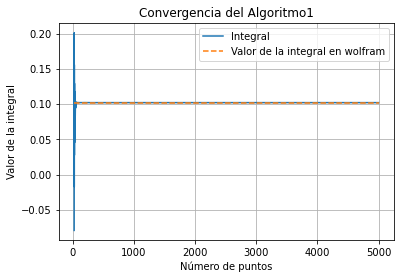

(Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [194]:
plot(num1,Arreglo_1,label="Integral")
plot(num1,Arreglo_convergencia,label="Valor de la integral en wolfram", linestyle='--')
title("Convergencia del Algoritmo1")
xlabel("Número de puntos"),ylabel("Valor de la integral"),legend(),grid(),show()

In [195]:
#por si no jala el que tiene la leyenda 
#plot(num1,Arreglo_1)
#plot(num1,Arreglo_convergencia)                                                
#title("Convergencia del Algoritmo1")
#xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()

#### <span style="color:green"> Para el segundo algoritmo (Simpson) </span> 

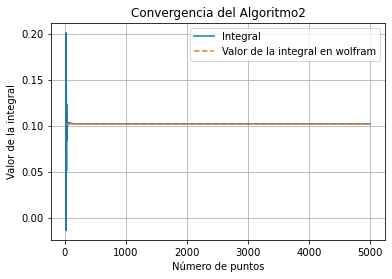

(Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [196]:
plot(num1,Arreglo_2,label="Integral")
plot(num1,Arreglo_convergencia,label="Valor de la integral en wolfram", linestyle='--')
title("Convergencia del Algoritmo2")
xlabel("Número de puntos"),ylabel("Valor de la integral"),legend(),grid(),show()

In [197]:
#por si no jala el que tiene la leyenda
#plot(num1,Arreglo_2)
#plot(num1,Arreglo_convergencia) 
#title("Convergencia del Algoritmo2")
#xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()  

#### <span style="color:green"> Para el tercer algoritmo (Boole) </span> 

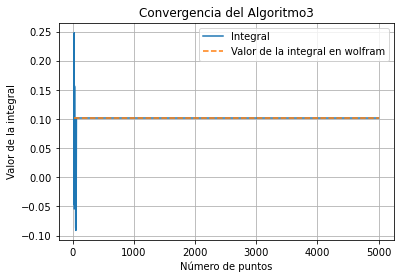

(Text(0.5, 17.700000000000003, 'Número de puntos'),
 Text(17.200000000000003, 0.5, 'Valor de la integral'),
 None,
 None)

In [198]:
plot(num1,Arreglo_3,label="Integral")
plot(num1,Arreglo_convergencia,label="Valor de la integral en wolfram", linestyle='--')
title("Convergencia del Algoritmo3")
xlabel("Número de puntos"),ylabel("Valor de la integral"),legend(),grid(),show()

In [199]:
#por si no jala el que tiene la leyenda
#plot(num1,Arreglo_2)
#plot(num1,Arreglo_convergencia) 
#title("Convergencia del Algoritmo3")
#xlabel("Número de puntos"),ylabel("Valor de la integral"),grid(),show()  

#### FIN :) 